## HOMEWORK 4.2

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
DATA_PATH = '/Users/iamantonozerov/MyFiles/PYTHON/HOMEWORKS/4.1/names/'

In [59]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(
        '/Users/iamantonozerov/MyFiles/PYTHON/HOMEWORKS/4.1/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [60]:
names_all.head(10)

Name Gender  Count
Year Pos                         
1900 0         Mary      F  16706
     1        Helen      F   6343
     2         Anna      F   6114
     3     Margaret      F   5304
     4         Ruth      F   4765
     5    Elizabeth      F   4096
     6     Florence      F   3920
     7        Ethel      F   3896
     8        Marie      F   3856
     9      Lillian      F   3414

In [61]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.head(10)

Count
Year Name          
1900 Aaron      103
     Abbie      112
     Abby         7
     Abe         56
     Abel        15
     Abigail     14
     Abner       21
     Abraham    100
     Abram       18
     Abron        5

In [62]:
name_dynamics.query('Name == ["Ruth", "Robert"]')

Count
Year Name         
1900 Robert   3845
     Ruth     4781
1905 Robert   3431
     Ruth     5088
1910 Robert   5638
     Ruth     7247
1915 Robert  28854
     Ruth    21926
1920 Robert  48886
     Ruth    26155
1925 Robert  61244
     Ruth    22326
1930 Robert  62576
     Ruth    15010
1935 Robert  56750
     Ruth    10041
1940 Robert  61401
     Ruth     8922
1945 Robert  70130
     Ruth     8062
1950 Robert  83778
     Ruth     7138
1955 Robert  83918
     Ruth     6202
1960 Robert  72649
     Ruth     4960
1965 Robert  63392
     Ruth     3242
1970 Robert  57533
     Ruth     1829
1975 Robert  35580
     Ruth     1235
1980 Robert  34530
     Ruth     1262
1985 Robert  32325
     Ruth     1125
1990 Robert  28976
     Ruth      913
1995 Robert  18624
     Ruth      856
2000 Robert  13758
     Ruth      902

In [63]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name')

Count         
Name   Robert     Ruth
Year                  
1900   3845.0   4781.0
1905   3431.0   5088.0
1910   5638.0   7247.0
1915  28854.0  21926.0
1920  48886.0  26155.0
1925  61244.0  22326.0
1930  62576.0  15010.0
1935  56750.0  10041.0
1940  61401.0   8922.0
1945  70130.0   8062.0
1950  83778.0   7138.0
1955  83918.0   6202.0
1960  72649.0   4960.0
1965  63392.0   3242.0
1970  57533.0   1829.0
1975  35580.0   1235.0
1980  34530.0   1262.0
1985  32325.0   1125.0
1990  28976.0    913.0
1995  18624.0    856.0
2000  13758.0    902.0

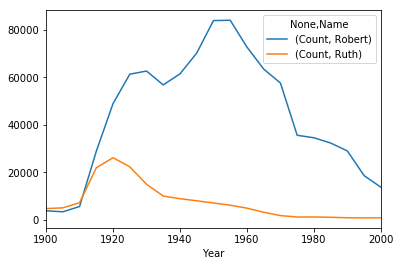

In [64]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

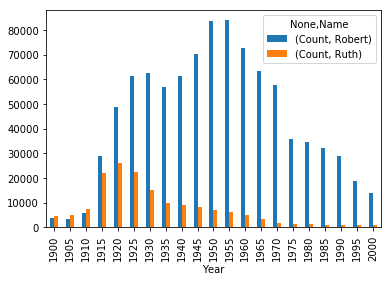

In [65]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

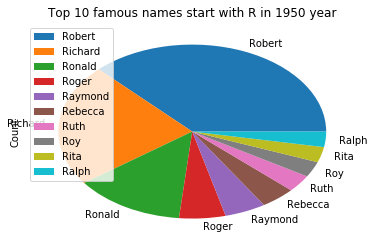

In [66]:
names_by_1950 = pd.read_csv(
        '/Users/iamantonozerov/MyFiles/PYTHON/HOMEWORKS/4.1/names/yob1950.txt',
        names=['Name','Gender','Count']
    )

names_start_with_R = names_by_1950[(names_by_1950.Name.str.startswith("R"))]

sorted_names_start_with_R = names_start_with_R.sort_values(by='Count', ascending =False).head(10)

sorted_names_start_with_R.plot.pie(y = 'Count',
                  title = 'Top 10 famous names start with R in 1950 year',
                  labels = sorted_names_start_with_R.Name, 
                 )

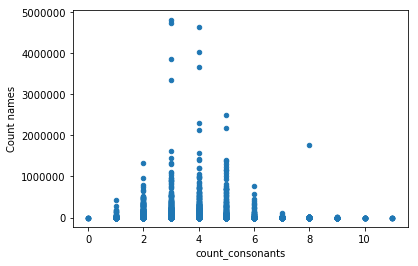

In [67]:
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv(
        '/Users/iamantonozerov/MyFiles/PYTHON/HOMEWORKS/4.1/names/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year)
name_dynamics = names_all.groupby('Name').sum().sort_values(by='Count', ascending =False)

def count_consonants(row):
    consonants = ['B', 'C', 'D', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N','P', 'Q', 'R', 'S', 'T', 'V', 
             'W', 'X', 'Y', 'Z'
            ] 
    n = 0
    for i in row.Name:
        if i.upper() in consonants:
            n+=1
    return n

x['count_consonants'] = x.apply(count_consonants, axis=1)
x.plot.scatter(x='count_consonants', y='Count')
plt.xlabel('count_consonants')
plt.ylabel('Count names')